In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects
import numpy as np
from dataclasses import dataclass
import pandas as pd
import vice
from scipy.interpolate import interp1d
from scipy.integrate import quad
import random

In [2]:
from surp.analysis.vice_model import vice_model
from surp.analysis import apogee_analysis as aah
import seaborn as sns
import arya
import surp

from statsmodels.distributions import ECDF


modified solar abundances via mag++22


In [3]:
fiducial = vice_model("../out/C11_f0.2_dt0.05_zw0.05.json")

In [6]:
max(fiducial.stars.zone_origin)

307.0

In [7]:
fiducial.stars.columns

Index(['formation_time', 'zone_origin', 'zone_final', 'mass', 'z(fe)', 'z(o)',
       'z(mg)', 'z(n)', 'z(c)', 'abs_z', 'r_origin', 'r_final', 'high_alpha',
       '[fe/h]', '[o/h]', '[mg/h]', '[n/h]', '[c/h]', '[o/fe]', '[mg/fe]',
       '[mg/o]', '[n/fe]', '[n/o]', '[n/mg]', '[c/fe]', '[c/o]', '[c/mg]',
       '[c/n]', 'z', '[m/h]', 'age', 'MG_H', 'MG_FE', 'C_MG', 'N_MG', 'C_N',
       '[fe/o]'],
      dtype='object')

In [7]:
tracks = pd.read_csv("../out/C11_f0.2_gaussian_dt0.05_gaussian_walks.dat")

In [22]:
model = surp.simulation.multizone_sim.create_model(".", "test", 0.5, migration_mode="gaussian")

using 32736 stars particles


/users/PAS2232/aeyobd/.local/lib/python3.9/site-packages/vice-1.4.0.dev2-py3.9-linux-x86_64.egg/vice/core/singlezone/singlezone.py:914: ScienceWarning: Closed-box GCE models have been shown to overpredict the metallicities of solar neighborhood stars. This was known as the G-dwarf problem (Tinsley 1980, Fundamentals of Cosmic Phys., 5, 287). Outflows have been shown to be necessary for maintaining long-term chemical equilibrium (Dalcanton 2007, ApJ, 658, 941).
  self.__c_version.eta = value


In [44]:
s = fiducial.stars_unsampled

In [56]:
filt = s.formation_time < 10
s1 = s[filt]

In [59]:
s1.columns

Index(['formation_time', 'zone_origin', 'zone_final', 'mass', 'z(fe)', 'z(o)',
       'z(mg)', 'z(n)', 'z(c)', 'abs_z', 'r_origin', 'r_final', 'high_alpha',
       '[fe/h]', '[o/h]', '[mg/h]', '[n/h]', '[c/h]', '[o/fe]', '[mg/fe]',
       '[mg/o]', '[n/fe]', '[n/o]', '[n/mg]', '[c/fe]', '[c/o]', '[c/mg]',
       '[c/n]', 'z', '[m/h]', 'age'],
      dtype='object')

In [65]:
dt = 13.2 - s1.formation_time
dr = (s1.r_final - s1.r_origin)
slope = dr / dt**0.5

In [ ]:
gaus = 

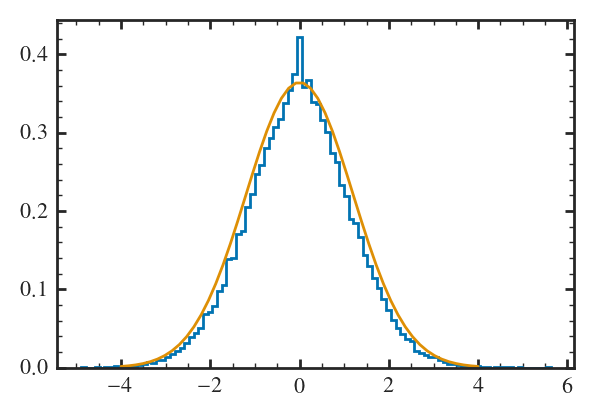

In [83]:
plt.hist(slope, 100, density=True, histtype="step");
x = np.linspace(-4, 4)
sigma = 1.2
y = 1/(2*np.pi*sigma)**0.5 * np.exp(-x**2/(2*sigma**2))
plt.plot(x, y)

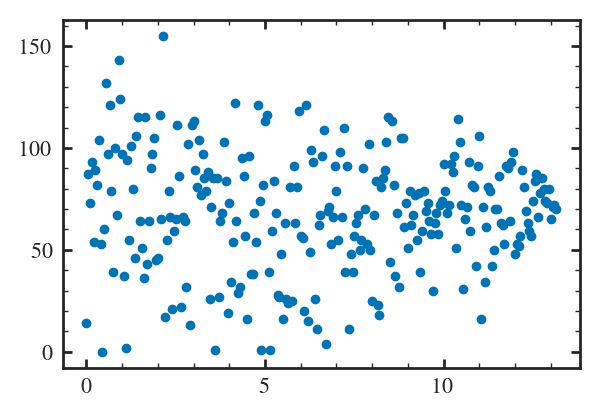

In [55]:
plt.scatter(df.formation_time, df.zone_final)

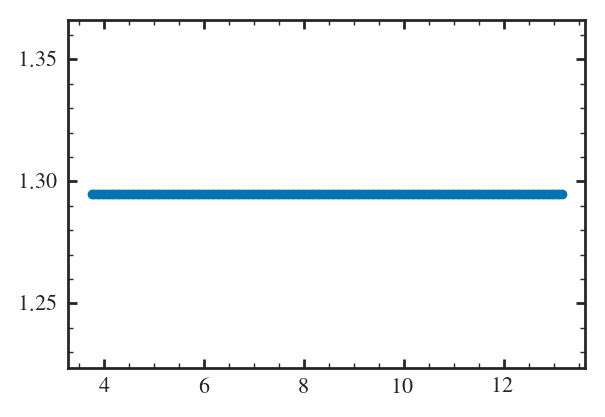

In [16]:
df = tracks[tracks.N == 15000]
plt.scatter(df.t, df.R)

Text(0.5, 0, '[Mg/Fe]')

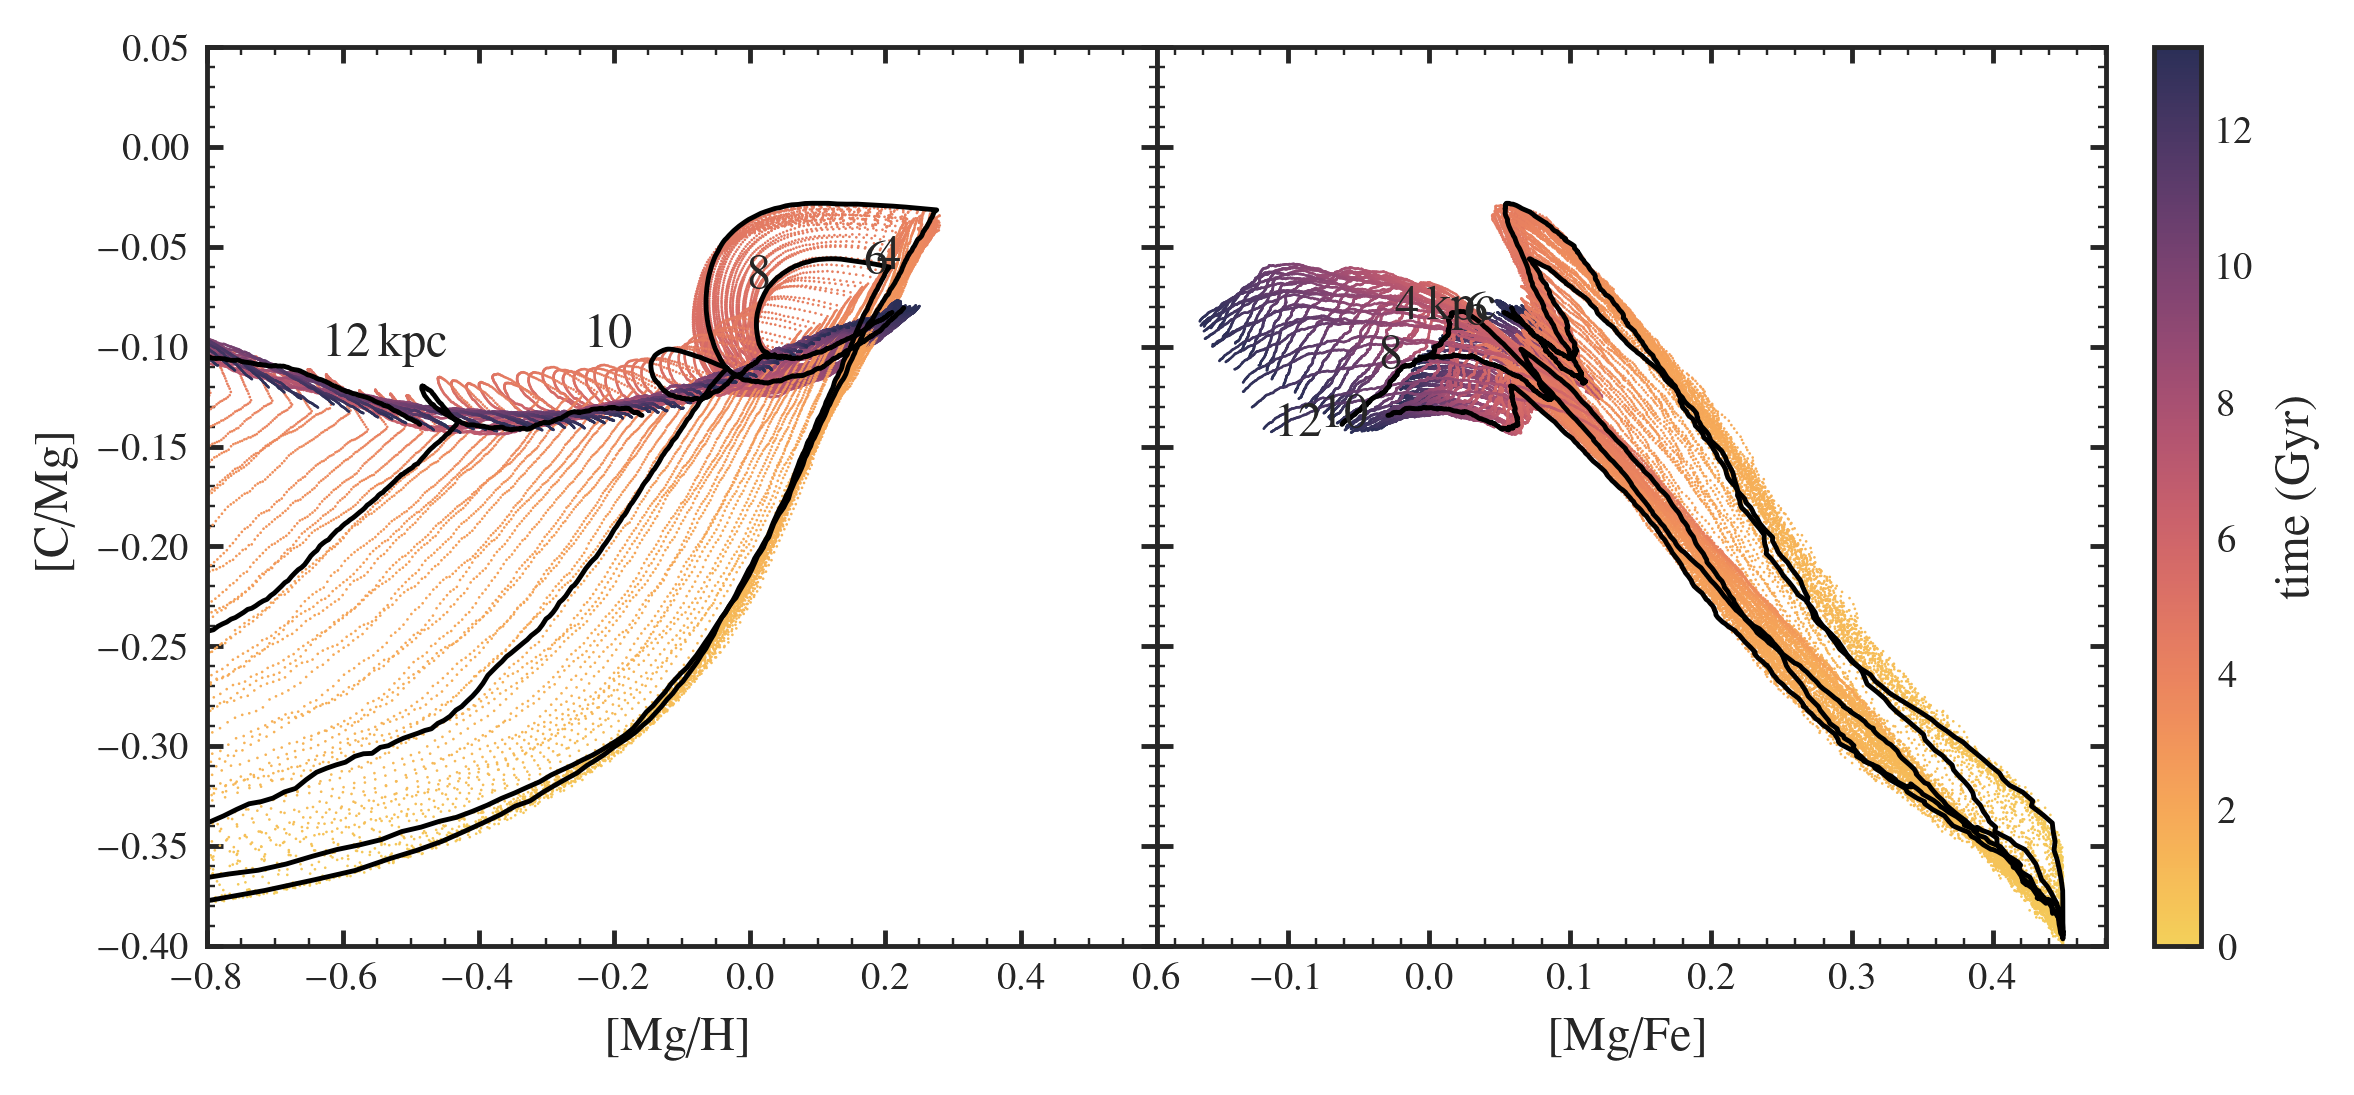

In [4]:
fig, axs = plt.subplots(1, 2, sharey=True, gridspec_kw={"wspace": 0}, figsize=(7, 10/3), dpi=350)

plt.sca(axs[0])
h = fiducial.history

coords = []

for R in [4, 6, 8, 10, 12]:
    df = h[np.isclose(h.R, R - 0.05)]
    plt.plot(df["[o/h]"], df["[c/o]"], color="k")
    coords.append((
            df["[o/h]"][-1], 
            df["[c/o]"][-1]
        ))


texts = [
    "4",
    "6",
    "8",
    "10",
    r"12\,kpc"
]

for i in range(len(coords)):
    if i >= 2:
        offset = (-6, 12)
    else:
        offset = (-3, 6)
    text = plt.annotate(texts[i], xy=coords[i],  zorder=20, ha="center", va="bottom",  
                        xycoords='data', textcoords='offset points', xytext=offset)

sns.scatterplot(h[(h.R > 2) & (h.R < 15.5)], x="[o/h]", y="[c/o]", hue="time", s=0.3, alpha=1, legend=False, edgecolor="none", palette="arya_r", rasterized=True)
plt.xlim(-0.8, 0.6)
plt.ylim(-0.4, 0.05)


plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")

plt.sca(axs[1])



filt = fiducial.history["[o/h]"] > -0.15
filt &= fiducial.history["[o/h]"] < -0.05
h = fiducial.history

cax = axs[1].inset_axes([1.05, 0., 0.05, 1])

cb = arya.Colorbar(clim=(0, 13.2), label=r"time (Gyr)", cmap="arya_r", cax=cax)

coords = []

for R in np.sort(h.R.unique()[19:155]):
    dfa = h[h.R == R]
    s = 1# 0*(0.05 - np.abs(dfa["[o/h]"] + 0.10))
    plt.scatter(dfa["[o/fe]"], dfa["[c/o]"], c=cb(dfa.time), s=0.3, ec="none", rasterized=True, zorder=1)
    if any(np.isclose(R+0.05, [4, 6, 8, 10, 12])):
        coords.append((
            dfa["[o/fe]"][-1], 
            dfa["[c/o]"][-1]
        ))

        plt.plot(dfa["[o/fe]"], dfa["[c/o]"], color="k", zorder=2, lw=1)
    

texts = [
    "4\\,kpc",
    "6",
    "8",
    "10",
    r"12"
]

for i in range(len(coords)):
    text = plt.annotate(texts[i], xy=coords[i],  zorder=20, ha="right",  va="center",
                        xycoords='data', textcoords='offset points', xytext=(-3, 0))
#     text.set_path_effects([mpl.patheffects.Stroke(linewidth=5, foreground='w'),
#                    mpl.patheffects.Normal()])
    
# plt.xlim(-0.05, 0.3)
# plt.ylim(-0.35, 0.05)
plt.xlabel("[Mg/Fe]")



# F AGB
Here, I want to make plots of the AGB Fraction across the galaxy.

In [28]:
def y_cc(Z):
    return surp.yields.C_CC_model(zeta=0.09, y0=0.004)(Z)

In [29]:
h = fiducial.history
m_star = h["sfr"]*1e9 # Msun/yr (default)
denom = 1 + h["eta_0"] - h["r_eff"]
Zc = h["z(c)"]
Mc = h["mass(c)"] # Msun
dt = h.time.unique()[1] # Gyr

smooth = 10
Mc_dot = np.concatenate([np.zeros(smooth), 
                         Mc[smooth:] - np.array(Mc[:-smooth]),
                        ]
                       )/(smooth*dt)
Z = h["z"]

yc_cc = y_cc(Z)
y_c = (Mc_dot + denom*Zc*m_star)/m_star
y_c_agb = y_c - yc_cc
f_agb = np.array(y_c_agb/y_c)

X = np.reshape(f_agb, (200, -1))

In [9]:
max(f_agb[f_agb < 0.5])

0.14888180221553168

(-1.0, 1.0)

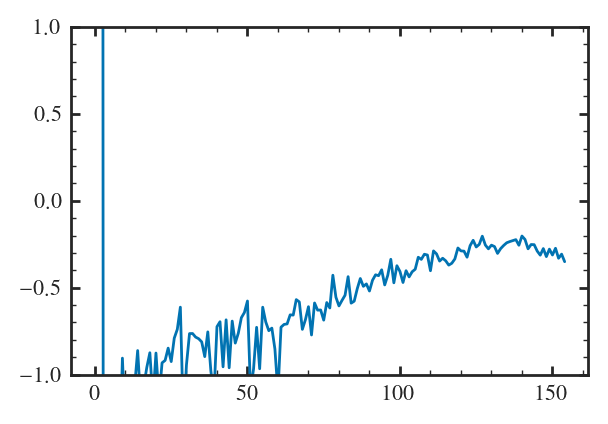

In [10]:
plt.plot(np.transpose(X)[-1,:])
plt.ylim(-1, 1)

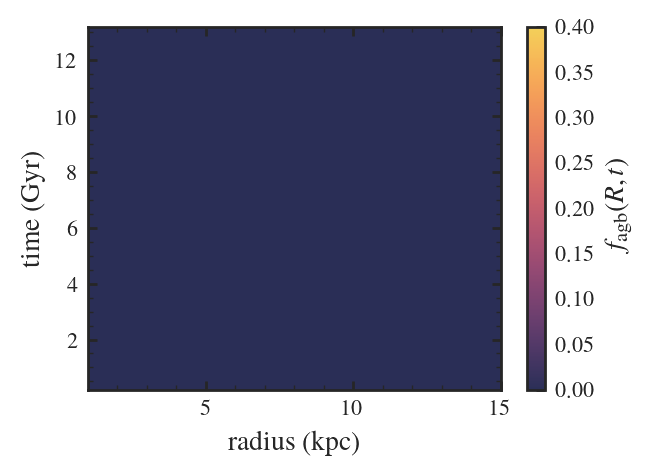

In [11]:
plt.figure(figsize=(10/3, 10/3/np.sqrt(2)))
plt.imshow(np.transpose(X)[::-1], clim=(0, 0.4), extent=(0, 20, 0, 13.2), aspect="auto")
plt.xlim(1, 15)
plt.ylim(smooth*dt)

plt.colorbar(label=r"$f_{\rm agb}(R, t)$")
plt.xlabel("radius (kpc)")
plt.ylabel("time (Gyr)")

plt.savefig("figures/f_agb_rt.pdf")

# Checking the MDFs

Text(0.5, 0, '[Mg/Fe]')

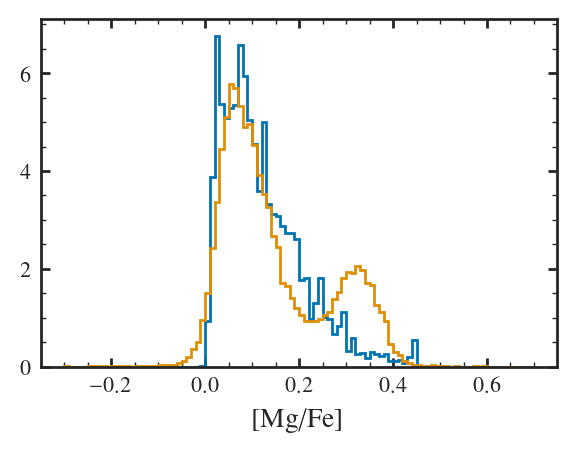

In [71]:
df = fiducial.stars

plt.hist(df["[o/fe]"], 100, histtype="step", density=True, range=(-0.3, 0.7))
plt.hist(aah.subgiants["MG_FE"], 100, histtype="step", density=True, range=(-0.3, 0.7));
plt.xlabel("[Mg/Fe]")

(array([ 669.,  658.,  832.,  711.,  838., 1140., 1093., 1190., 1131.,
        1215., 1226.,  892.,  405.]),
 array([ 0.        ,  1.00769231,  2.01538462,  3.02307692,  4.03076923,
         5.03846154,  6.04615385,  7.05384615,  8.06153846,  9.06923077,
        10.07692308, 11.08461538, 12.09230769, 13.1       ]),
 <BarContainer object of 13 artists>)

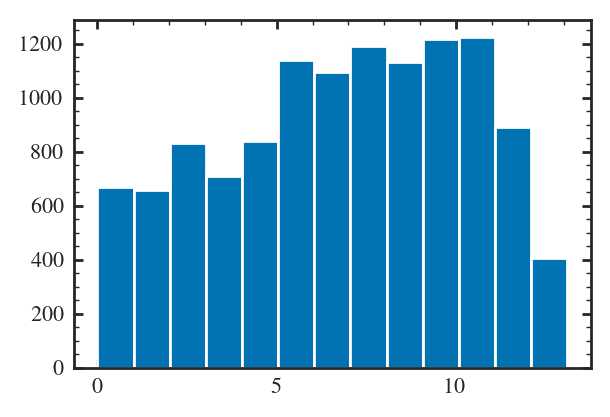

In [72]:
plt.hist(df["age"], 13)

Text(0.5, 0, '[C/Mg]')

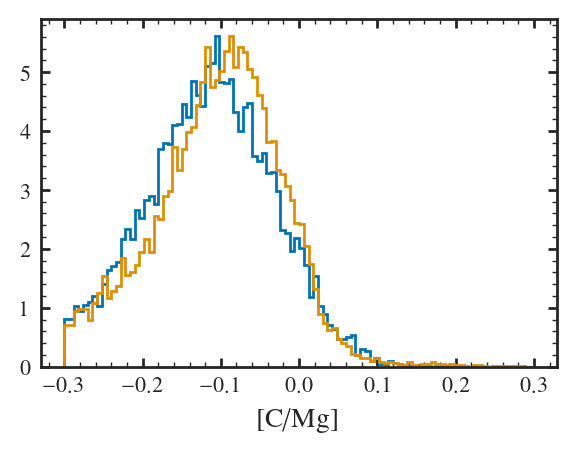

In [73]:
df = fiducial.stars

plt.hist(df["[c/o]"] + np.random.normal(0, 0.07, len(df)), 100, histtype="step", density=True, range=(-0.3, 0.3))
plt.hist(aah.subgiants["C_MG"], 100, histtype="step", density=True, range=(-0.3, 0.3));
plt.xlabel("[C/Mg]")

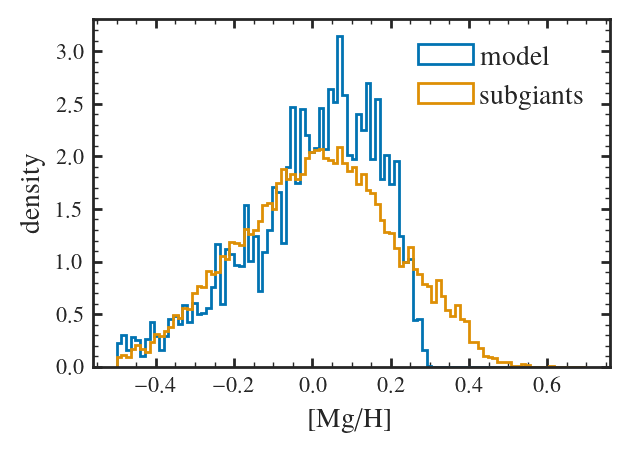

In [74]:
df = fiducial.stars

plt.hist(df["[mg/h]"] + np.random.normal(0, 0.0, len(df)), 100, histtype="step", density=True, range=(-0.5, 0.7), label="model")
plt.hist(aah.subgiants["MG_H"], 100, histtype="step", density=True, range=(-0.5, 0.7), label="subgiants");
plt.xlabel("[Mg/H]")
plt.ylabel("density")
plt.legend()
plt.savefig("mdf.pdf")

Text(0.5, 0, '[O/H]')

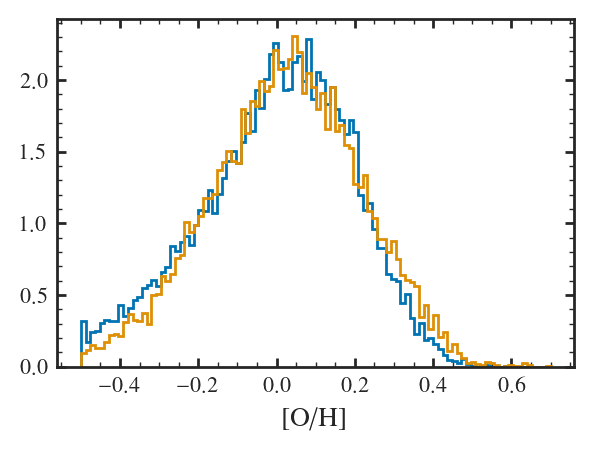

In [75]:
df = fiducial.stars

plt.hist(df["[o/h]"] + np.random.normal(0, 0.1, len(df)), 100, histtype="step", density=True, range=(-0.5, 0.7))
plt.hist(aah.subgiants["O_H"], 100, histtype="step", density=True, range=(-0.5, 0.7));
plt.xlabel("[O/H]")

Text(0.5, 0, '[Fe/H]')

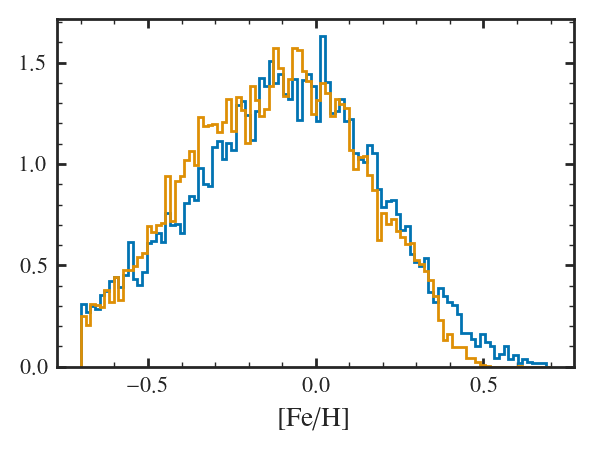

In [76]:
df = fiducial.stars

plt.hist(df["[fe/h]"] + np.random.normal(0, 0.2, len(df)), 100, histtype="step", density=True, range=(-0.7, 0.7))
plt.hist(aah.subgiants["FE_H"], 100, histtype="step", density=True, range=(-0.7, 0.7));
plt.xlabel("[Fe/H]")

(0.0, 1.0)

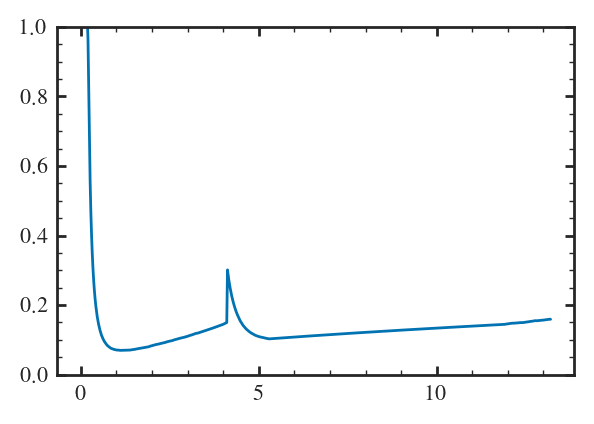

In [9]:
ino = surp.simulation.models.insideout.timescale

h = fiducial.history[np.isclose(fiducial.history.R, 7.05)]
tau_star = h.mgas / h.sfr / 1e9
plt.plot(h.time, tau_star/[ino(r) for r in h.R])
plt.ylim(0, 1)

Text(0, 0.5, 'sfr')

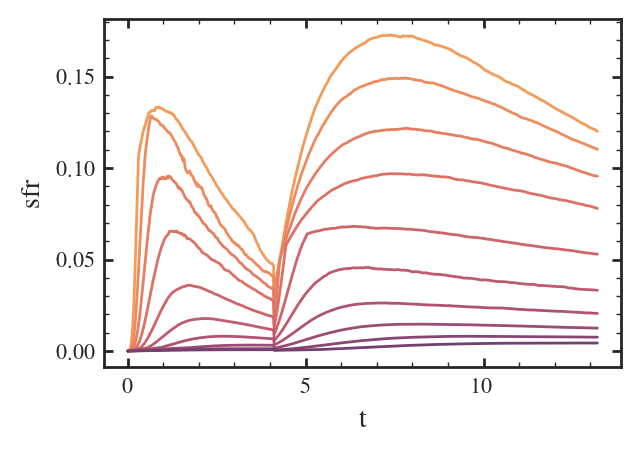

In [7]:
hmap = arya.figure.colorbar.HueMap((0, 15.5), cmap="arya_r")
for R in (np.arange(3, 13, 1) + 0.05):
    h = fiducial.history[np.isclose(fiducial.history.R, R)]
    tau_star = h.sfr
    plt.plot(h.time, tau_star, color=hmap(R))

plt.xlabel("t")
plt.ylabel("sfr")

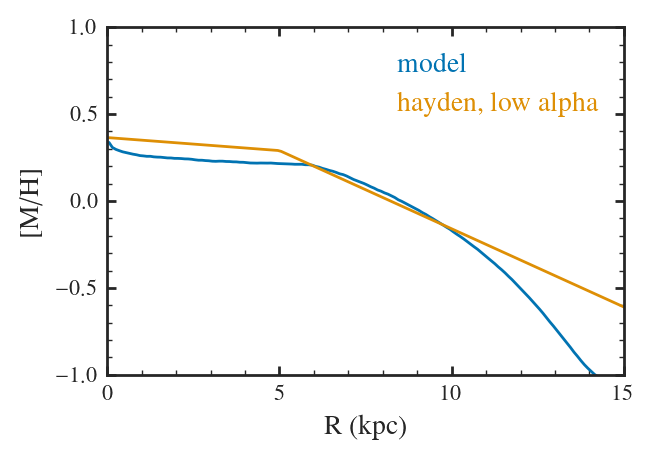

In [25]:
h = fiducial.history[fiducial.history.time == 13]
plt.xlim(0, 15)
plt.plot(h.R, h["[mg/h]"], label="model")
plt.ylim(-1, 1)

x = h.R

plt.plot(x, surp.simulation.multizone_sim.MH_grad(x), label="hayden, low alpha")
plt.xlabel("R (kpc)")
plt.ylabel("[M/H]")

# arya.medianplot(giants[~giants.high_alpha], "R_gal", "MG_H", binsize=500, stat="median", errorbar='pi', label="giants, low alpha")
# arya.medianplot(fiducial.stars, "r_final", "MG_H", binsize=500, stat="median", errorbar='pi')

arya.Legend(color_only=True)
plt.savefig("M_H.pdf")

Text(0, 0.5, 'eta')

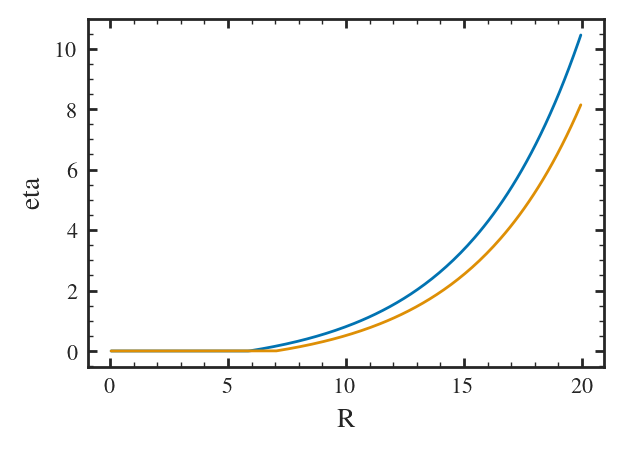

In [26]:
plt.plot(h.R, h.eta_0)
eta = surp.simulation.multizone_sim.mass_loading(tau_s_sf=0)
plt.plot(h.R, eta(h.R))
plt.xlabel("R")
plt.ylabel("eta")

In [29]:
df = fiducial.stars_unsampled

num = 10_000
idx = random.choices(np.arange(len(df)), weights=df["mass"], k=num)

result = {key: np.zeros(num) for key in df.keys()}


for i in range(num):
    for key in df.keys():
        result[key][i] = df[key][idx[i]]
        
result = pd.DataFrame(result)

In [27]:
plt.scatter(result["[o/h]"], result["[c/o]"], s=1)

NameError: name 'result' is not defined

In [30]:
df = giants[~giants["high_alpha"]]

In [35]:
result["[c/h]"] = result["[c/o]"] + result["[o/h]"]
result["[n/h]"] = result["[n/o]"] + result["[o/h]"]

result["[cn/h]"] = np.log10(10**(result["[c/h]"] + 8.39) + 10**(result["[n/h]"] + 7.78)) - np.log10(10**8.39 + 10**7.78)
result["[cn/o]"] = result["[cn/h]"] - result["[o/h]"] + 0.075

In [ ]:
arya.plotting.medianplot(result, x="[o/h]", y="[cn/o]",stat="median", aes="line", binsize=100, errorbar=None, label="model")


arya.plotting.medianplot(df, x="MG_H", y="CN_MG", binsize=200, stat="median", label="APOGEE Giants")
plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")

plt.xlim(-0.65, 0.4)
plt.ylim(-0.2, 0.15)

arya.Legend(color_only=True)
plt.savefig("cpn.pdf")



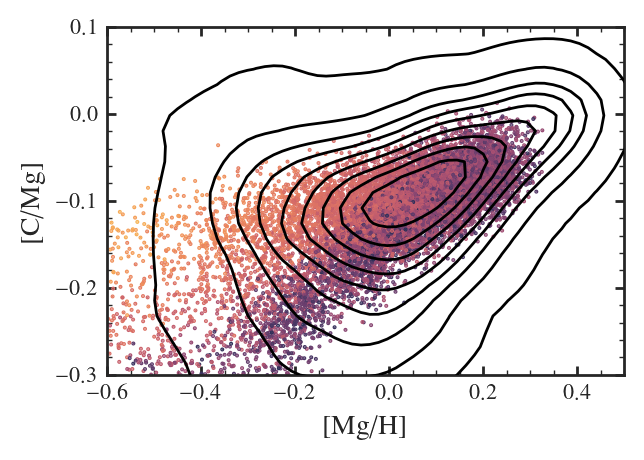

In [77]:
s = fiducial.stars
N = len(s)
dx = 0.025
dy = 0.025
aah.plot_contour("[mg/h]", "[c/mg]", zorder=3, exclude_high_alpha=False)

plt.scatter(s["[mg/h]"] + np.random.normal(0, dx, N), s["[c/mg]"] + np.random.normal(0, dy, N), 
             c = s["r_origin"], s=0.2, zorder=2)
plt.xlim(-0.6, 0.5)
plt.ylim(-0.3, 0.1)
plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")

plt.savefig("figures/fiducial_scatter.pdf")

Text(0, 0.5, '[Mg/Fe]')

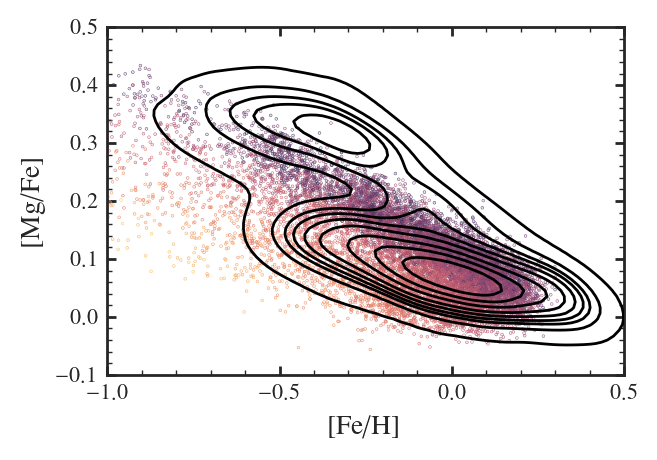

In [78]:
s = fiducial.stars
N = len(s)
dx = 0.025
dy = 0.025
aah.plot_contour("[fe/h]", "[mg/fe]", zorder=3, exclude_high_alpha=False)

plt.scatter(s["[fe/h]"] + np.random.normal(0, dx, N), s["[mg/fe]"] + np.random.normal(0, dy, N), 
             c = s["r_origin"], s=0.03, zorder=2)


plt.xlim(-1, 0.5)
plt.ylim(-0.1, 0.5)
plt.xlabel("[Fe/H]")
plt.ylabel("[Mg/Fe]")


Text(0, 0.5, '[N/Mg]')

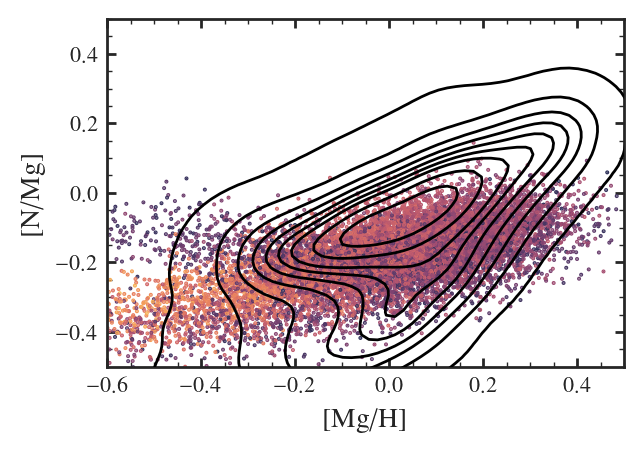

In [18]:
s = fiducial.stars
N = len(s)
dx = 0.09
dy = 0.05
aah.plot_contour("[mg/h]", "[n/mg]", zorder=3, exclude_high_alpha=False)

plt.scatter(s["[mg/h]"] + np.random.normal(0, dx, N), s["[n/mg]"] + np.random.normal(0, dy, N), 
             c = s["r_origin"], s=0.2, zorder=2)
plt.xlim(-0.6, 0.5)
plt.ylim(-0.5, 0.5)
plt.xlabel("[Mg/H]")
plt.ylabel("[N/Mg]")


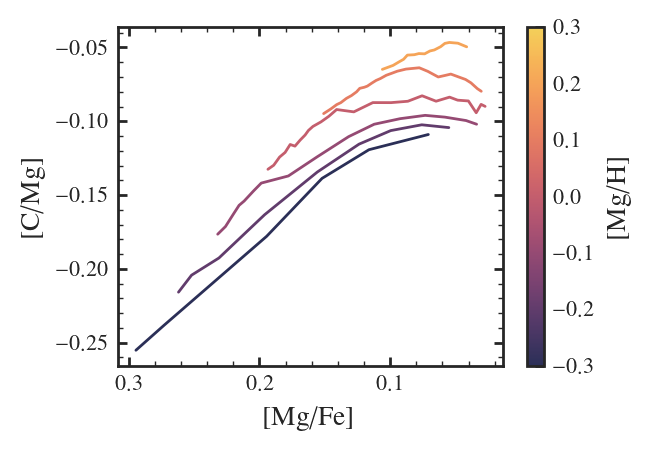

In [30]:
plt.figure(figsize=(10/3, 10/3/2**0.5))

cb = arya.Colorbar(clim=(-0.3, 0.3), label="[Mg/H]")

s = fiducial.stars
for MH in (-0.3, -0.2,-0.1,0, 0.1, 0.2,0.3):
    mh0 = MH - 0.05
    mh1 = MH + 0.05
    filt = s["[o/h]"] > mh0
    filt &= s["[o/h]"] < mh1
    df = s[filt]
    
    arya.medianplot(df, x="[o/fe]", y="[c/o]", binsize=100, color=cb(MH), aes="line", errorbar=None)

plt.gca().invert_xaxis()

plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")

plt.tight_layout()
plt.savefig("figures/fiducial_caafe_binned.pdf")

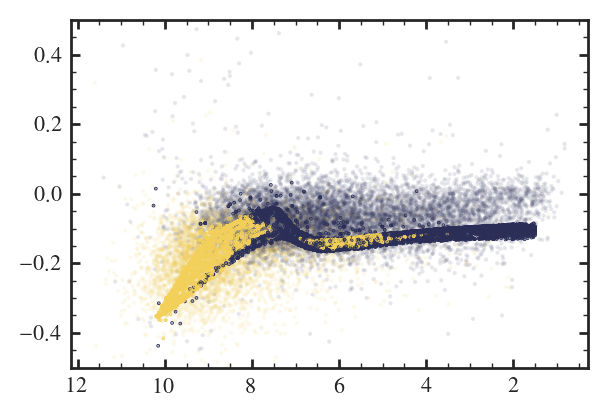

In [21]:
plt.scatter(aah.subgiants.age, aah.subgiants.C_MG, c=aah.subgiants.high_alpha, s=0.3, alpha=0.1)
plt.gca().invert_xaxis()
plt.ylim(-0.5, 0.5)

plt.scatter(fiducial.stars.age/1.5 + 1.5, fiducial.stars["[c/mg]"], c=fiducial.stars.high_alpha, s=0.1)

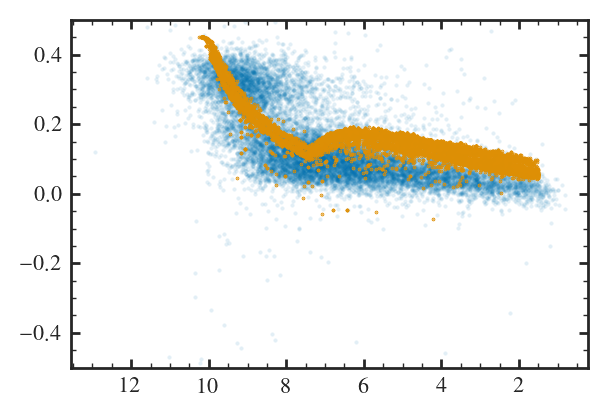

In [22]:
plt.scatter(aah.subgiants.age, aah.subgiants.MG_FE, s=0.3, alpha=0.1)
plt.gca().invert_xaxis()
plt.ylim(-0.5, 0.5)

plt.scatter(fiducial.stars.age/1.5 + 1.5, fiducial.stars["[mg/fe]"], s=0.1)
plt.ylim()